In [38]:
import numpy as np
import matplotlib.pyplot as plt

<h3> Ciąg Fibonacciego

$a_1 = 1$,  
$a_2 = 1$,  
$a_n = a_{n-1}+a_{n-2}$

<h4> Zadanie1: 
    
- Wyznacz 30 kolejnych wyrazów tego ciągu.
  
- Narysuj wykres zależności $a_n$ od $n$.
  
- Narysuj wykres zależności $\frac{\log a_{n-1}}{\log a_{n}}$ od $n$ dla $n=4, 5, ..., 100$.

***Własność***

$b_n= \frac{\log a_{n-1}}{\log a_n} \approx \frac{n-1}{n}$

<h4> Praktyczne zastosowanie w biologii?

Na podstawie: D. Cambui, Metabolic scaling from Fibonacci dynamics, 2025  
https://arxiv.org/pdf/2508.21077

oraz

West GB, Brown JH, Enquist BJ. A general model for the origin of allometric scaling laws in biology Science. 1997

Jak zmienia się metabolizm z masą? $B = B_0M^{3/4}$. Eksperymentalnie wiadomo jednak, że wykładnik $k$ jest bardziej zróżnicowany - znajduje się w przedziale (0.68 - 0.87).

W ogólności, mając $M_0, M_1$ można rozważać $M_n = M_{n-1}+M_{n-2}$  

Własność $M_n \sim \phi^n$, gdzie $\phi = \frac{1+\sqrt{5}}{2}$.

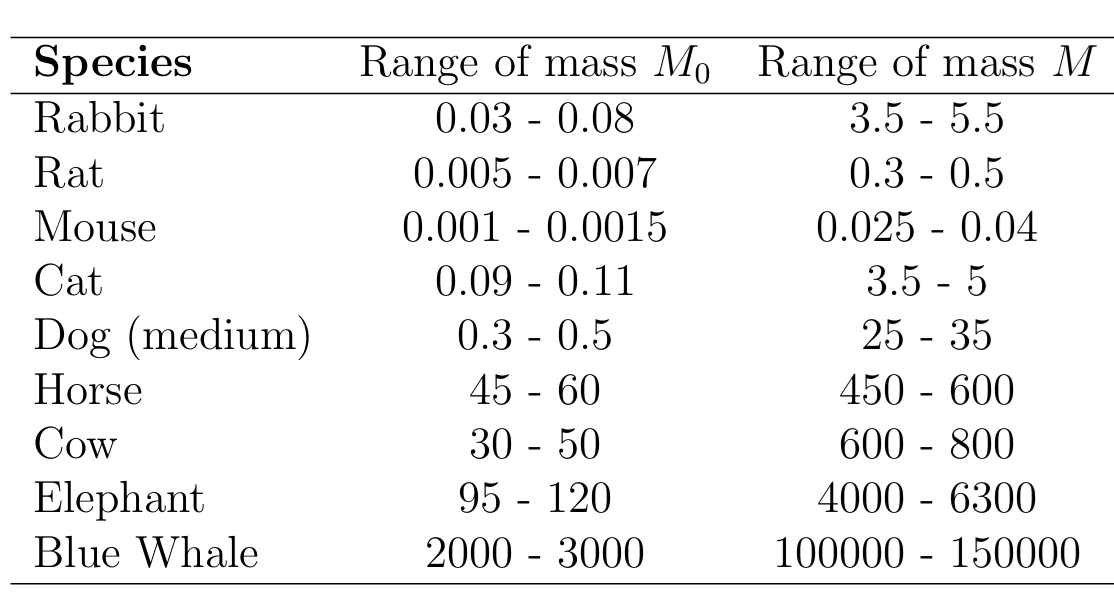

In [25]:
from IPython import display
display.Image("fib.png")

<h4> Zadanie2: 
    
- Przyjmując $M_n = M_0 \phi^n$ wzynacz $n$.

- Wyznacz $n$ dla każdego z powyższych organizmów (przyjmij wartości średnie z tabeli).
  
- Przyjmując $B_n = B_0 M^{b_n}$, gdzie $b_n = \frac{n-1}{n}$ wyznacz wartości wykładników dla kolejnych organizmów.

<h3> Model logistyczny

$x_n = k \cdot x_{n-1}(1-x_{n-1})$, gdzie $x_0 \in [0,1]$, $k\in [0,4]$.

<h4> Zadanie3:

- Narysuj wykres zależności $x_n$ od $n$ (typu scatter plot) dla $x_0 = 0.6$ oraz $k \in \lbrace 2.5, 3.1, 3.48, 3.83, 4 \rbrace$.
   

<h3> Szeregi czasowe

<h4> Przykład: Narysuj wykres $X_n = 0.7X_{n-1}-0.2X_{n-2} + \varepsilon_n$, gdzie $\varepsilon_n \sim N(0,1)$.

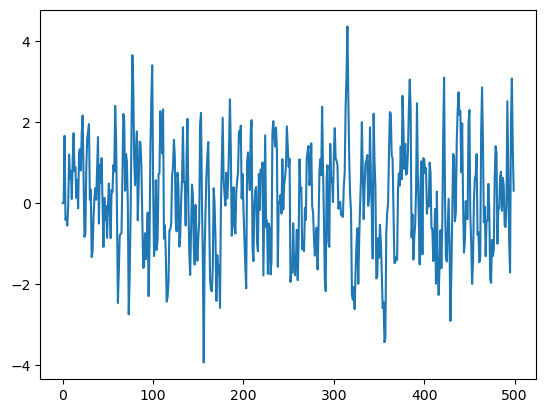

In [9]:
import numpy as np

n = 500
x = np.zeros(n)
eps = np.random.normal(0, 1, n)

for i in range(2, n):
    x[i] = 0.7*x[i-1] -0.2*x[i-2] + eps[i]

plt.plot(x)
plt.show()

<h4> Zadaie4: Poniżej przedstawiono znormalizowany poziom ekspresji genu $p53$ w kolejnych chwilach czasowych $X_n$. Zbuduj model pozwalający przewidywać poziom ekspresji w oparciu o wartości z dwóch poprzednich chwil czasowych.

<h4 style="text-align:center;">$X_n = aX_{n-1}+bX_{n-2} + c+ \varepsilon_n$, gdzie $\varepsilon_n \sim N(0,1)$</h4>

Możesz wykorzystać model regresji liniowej https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Narysuj na jednym wykresie wartości rzeczywiste i przewidywania.
- Podaj predykcje na cztery kolejne, przyszłe chwile czasowe.

In [87]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.array([6, 8, 9, 11])
reg = LinearRegression().fit(X, y)
print(reg.coef_, reg.intercept_)

[1. 2.] 3.000000000000001


In [72]:
p53 = [0.0, 0.0, -0.04, -1.96, -2.15, -1.45, -2.44, -2.95, -2.2, -1.99, -2.93, -1.82, -0.79, -0.89, 0.29, 1.26, 1.84, 2.01, 0.28, 0.69, 0.72, 0.02, 0.48, 0.99, 0.74, 0.51, -0.04, -0.55, 0.22, 0.78, -0.72, -0.42, 0.84, 0.15, 0.36, -1.75, -1.78, -0.81, -0.85, 0.22, 0.55, 0.05, -0.36, -0.56, -0.27, 1.51, 2.6, 3.05, 1.72, 0.11, 1.36, -0.8, -0.25, -1.16, -1.36, -2.56, -5.19, -4.69, -5.45, -5.51, -4.93, -4.48, -4.8, -3.28, -3.57, -1.82, 1.02, 2.15, 2.37, 2.22, 1.39, 3.16, 2.02, 3.38, 2.75, 2.97, 3.98, 4.34, 4.43, 3.58, 4.79, 4.65, 5.22, 5.21, 5.64, 4.38, 2.84, 3.44, 5.68, 5.78, 5.32, 3.94, 3.11, 3.71, 3.8, 4.66, 3.74, 1.89, 2.52, 3.52]

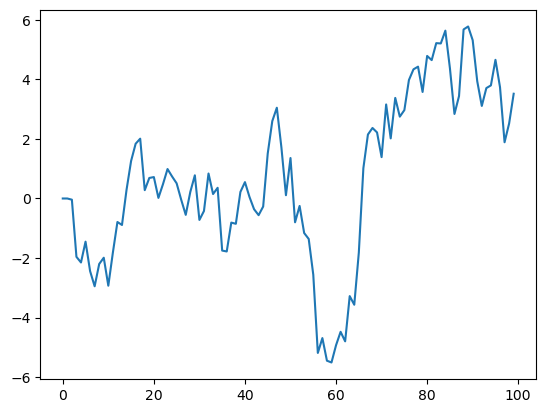

In [77]:
plt.plot(p53)
plt.show()

<h3> Procesy gałązkowe (Galton-Watson)


Inspiracja: Czy nazwiska rodowe muszą zaniknąć, jeśli każdy mężczyzna ma losową liczbę synów?

Niech zmienne losowe $Z_0, Z_1, \dots, Z_n$ opisują liczbę osobników w kolejnych generacjach.  
Zwykle przyjmuje się $Z_0 = 1$.

$$
Z_{n+1} = \sum_{i=1}^{Z_n} X_i^{(n)}
$$

gdzie $X_i^{(n)}$ to liczba (męskich) potomków $i$-tego osobnika w generacji $n$.  
Zmienne te mają ustalony rozkład $X \sim P$.

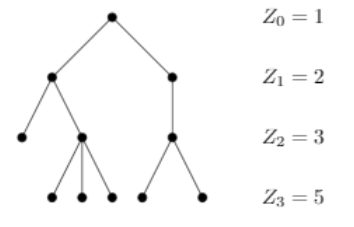

In [39]:
from IPython import display
display.Image("gw.png")

Rozważamy prawdopodobieństwo wymarcia:

$$
P_w = \lim_{n \to \infty} P(Z_n = 0)
$$

**Twierdzenie:**

$$
P_w =
\begin{cases} 
1 & \text{gdy } \mathbb{E}[X] \le 1, \\[2mm]
<1 & \text{gdy } \mathbb{E}[X] > 1.
\end{cases}
$$


<h4> Zadanie4: Załóżmy, że liczba potomków męskich ma rozkład Poissona z parametrem $\lambda = 2$.
Zasymuluj 200 losowych procesów Galtona-Watsona po 20 pokoleń, zaczynając od jednego osobnika ($Z_0=1$).
Oszacuj prawdopodobieństwo wymarcia jako odsetek symulacji, w których populacja osiągnęła 0 potomków w dowolnym momencie. Potestuj też inne parametry $\lambda$, np. 0.9, 3.

In [15]:
#Jak generować liczby z rozkładu Poissona?
np.random.poisson(5, 2) #2 obserwacje z rozkładu Poissona z Lambda =2

array([9, 5])

***Twierdzenie: Dla rozkładu Poissona, $P_w = e^{\lambda (P_w - 1)}$***

Zastosowania:
- Biologia: dziedziczenie chromosomu Y, mitochondriów → tylko garstka mężczyzn pozostawia trwałą linię męską, większość współczesnych ludzi dziedziczy mitochondria od relatywnie niewielkiej grupy kobiet, tzw. „mitochondrialnej Ewy”.
- Epidemiologia (rozprzestrzenianie się chorób)
- Fizyka jądrowa (reakcje łańcuchowe)
- Informatyka (algorytmy wyszukiwania drzewiastego np. BFS)
- Finanse (łańcuchy aktywności rynkowej, transakcje)


<h3> Sekwencje biologiczne 

- Generowanie sekwencji losowych

In [5]:
import random as r

In [6]:
#Model1. Pozycje są niezależne
def random_seq(length, dist):
    '''Funkcja zwraca losową sekwencje o zadanej dlugosci i zadanej czestosci liter alfabetu'''
    distT = []
    h = 0
    for (k, v) in dist.items():
        h += v
        distT.append((k,h))
    s = ''
    for x in range(length):
        ran = r.random()
        for k,v in distT:
            if ran <= v:
                s+=k
                break
    return s

##############przyklad
dist = {'A':0, 'C':1/3,'G':1/3,'T':1/3}
seq = random_seq(10, dist) #podajemy długość sekwencji, tutaj 10
##############
print(seq)

CCGTTCCGTC


In [10]:
#Model2. Bieżący nukleotyd jest zależny od wcześniejszego (model Markowa rzędu 1):
def random_seq2(length, nuc, firstN, trans):
    '''Funkcja zwraca losowa sekwencje o zadanej dlugosci i zadanej macierzy przejsc'''
    s_losowa = ''
    for i in range(length):
        if i>0:
            s_losowa+=np.random.choice(nuc, 1, p=trans[s_losowa[-1]])[0]
        else:
            s_losowa+=np.random.choice(nuc, 1, p=firstN)[0]
    return s_losowa

nuc = ["A","C","G","T"]
trans = {} #macierz przejsc (mozemy zablokowac lub wzmocnić pewne przejścia, w przykladzie ponizej nie będzie sekwencji CA)

####################przyklad
#              "A",  "C",  "G",  "T"
trans['A'] = [0.25, 0.25, 0.25, 0.25]
trans['C'] = [0,    1/3,   1/3, 1/3]
trans['G'] = [0.25, 0.25, 0.25, 0.25]
trans['T'] = [0.25, 0.25, 0.25, 0.25]

firstN = [0.25, 0.25, 0.25, 0.25] #pierwszy nukleotyd będzie zupelnie losowy
seq = random_seq2(100, nuc, firstN, trans)  #podajemy dlugosc sekwencji, tutaj 100
#####################
print(seq)

CCCTTTGCGGACTAATGCGGTATCGGTGCTACTCTTGAGCGGATTGCTTAAAAGGCGCTGACGTCCGAAGACCTCCTTGCGAATAGAGGTGCGTTCGCCG


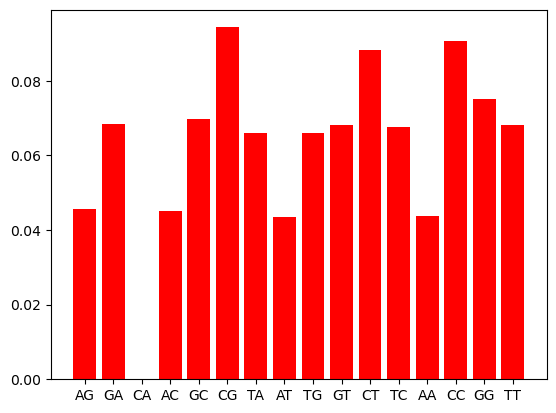

In [12]:
#Wyznaczanie częstosci dinukleotydów dla zadanej sekwencji 
################################
seq = random_seq2(10000, nuc, firstN, trans)
################################


diplets = {'AG':0, 'GA':0, 'CA':0, 'AC':0, 'GC':0, 'CG':0, 'TA':0,'AT':0,'TG':0, 'GT':0,'CT':0,'TC':0, 'AA':0, 'CC':0, 'GG':0, 'TT':0}

n = len(seq)-1
for i in range(n):
    letters[seq[i]]+=1
    diplets[seq[i:(i+2)]]+=1
letters[seq[n]]+=1


sumD = sum(diplets.values())
norD = {k:v/sumD for k,v in diplets.items()}

height_norD = norD.values()
bars = norD.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norD,color="red")
plt.xticks(y_pos, bars)
plt.show()

Zauważ, że brak CA wpłynął też na inne dinukleotydy.

<h4> Zadanie5:

- Pobierz sekwencję neuraminidazy wirusa grypy https://www.ncbi.nlm.nih.gov/nuccore/J02156.1.
  
- Wyznacz macierz prawdopodobieństw przejść $X->Y$, gdzie $X, Y \in \lbrace A, C, T, G \rbrace$.

<h4> Zadanie6:

- Z NCBI pobierz sekwencję wybranego genu w którym występują introny oraz eksony.

- Wyznacz macierz prawdopodobieństw przejść $X->Y$ osobno dla intronów i eksonów.

- Porównaj otrzymane macierze.

Zastosowania
- analiza motywów sekwencyjnych
- porównywanie sekwencji
- szukanie/przewidywanie eksonów/intronów